# Proyecto 2: Primera parte
Curso Ingeniería de Características

**Estephania Pivac Alcaraz**

**Profesor: Dr. Julio Waissman**

---

**Problema de interés:**
Estudiar la relación que existe entre la cantidad de accidentes de tránsito y la inversión a la conservación de carreteras y presupuesto gubernamental.

## 1. Abriendo las bases de datos

Abrimos las bases de datos que estaremos utilizando. Para esto construiremos los dataframes necesarios así como también limpiaremos y analizaremos dichos datos.

Comenzamos importando librerías que necesitaremos

In [1]:
# Instalamos Pandas-profiling
#pip install Pandas-Profiling

# Importamos algunas librerías que vamos a necesitar
import os  # Para manejo de archivos y directorios
import urllib.request # Una forma estandard de descargar datos
# import requests # Otra forma no de las librerías de uso comun

import datetime # Fecha de descarga
import pandas as pd # Solo para ver el archivo descargado
import zipfile # Descompresión de archivos
import numpy as np
from pandas_profiling import ProfileReport

### 1.1 Tidy_accidentes: Base de datos de accidentes de tránsito

Abrimos el archivo con la información de los accidentes de tránsito en México desde 2017 hasta 2021. Generamos el dataframe con el que estaremos trabajando y convertimos cada columna al tipo de dato adecuado.

In [2]:
# Generamos el dataframe de accidentes
tidy_accidentes = pd.read_csv("tidy_accidentes.csv", index_col=False)

# Convertimos cada variable de acuerdo a su tipo
# Categoricas
#tidy_accidentes = tidy_accidentes.astype({'TIPACCID':'category', 'CAUSAACCI':'category', 'CAPAROD':'category', 'CLASACC':'category', 'EDAD':'category'})

# Fechas
tidy_accidentes['FECHA'] = pd.to_datetime(tidy_accidentes['FECHA'], format='%Y/%m/%d', errors='coerce')
#tidy_accidentes.info()

Observemos la estructura de la base de datos:

In [3]:
tidy_accidentes.head()

,ID_ENTIDAD,ANIO,TIPACCID,CAUSAACCI,CAPAROD,CLASACC,FECHA,EDAD
0,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-03,28-37
1,1,2021,Salida del camino,Conductor,Pavimentada,No fatal,2021-01-04,Menor de edad
2,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-17,48-57
3,1,2021,Salida del camino,Conductor,Pavimentada,Sólo daños,2021-01-26,Se fugó
4,1,2021,Colisión con vehículo automotor,Conductor,Pavimentada,Sólo daños,2021-01-28,38-47


Veamos que esta base de datos no contiene datos faltantes:

In [4]:
tidy_accidentes.isnull().sum()

ID_ENTIDAD    0
ANIO          0
TIPACCID      0
CAUSAACCI     0
CAPAROD       0
CLASACC       0
FECHA         0
EDAD          0
dtype: int64

Seleccionamos únicamente las columnas de interés:

In [5]:
tidy_accidentes = tidy_accidentes[['ID_ENTIDAD', 'ANIO', 'CAUSAACCI', 'CLASACC']]
tidy_accidentes

,ID_ENTIDAD,ANIO,CAUSAACCI,CLASACC
0,1,2021,Conductor,Sólo daños
1,1,2021,Conductor,No fatal
2,1,2021,Conductor,Sólo daños
3,1,2021,Conductor,Sólo daños
4,1,2021,Conductor,Sólo daños
...,...,...,...,...
81843,32,2017,Conductor,Sólo daños
81844,32,2017,Conductor,Fatal
81845,32,2017,Conductor,Fatal
81846,32,2017,Conductor,No fatal


### 1.2 Tidy conservación: Base de datos de conservación de carreteras del año 2019

Abrimos el archivo csv y lo guardamos en formato de dataframe

In [6]:
# Generamos el dataframe de conservación
tidy_conservacion = pd.read_csv("tidy_conservacion.csv", index_col=False)
tidy_conservacion

# Convertimos cada variable de acuerdo a su tipo
# Categoricas
#tidy_conservacion = tidy_conservacion.astype({'ENTIDAD':'category', 'PROGRAMA_CONSERVACION':'category'})

# Convertimos TOTAL_CONSERVACION a int
tidy_conservacion = tidy_conservacion.astype({'TOTAL_CONSERVACION':'int'})

tidy_conservacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID_ENTIDAD             1859 non-null   int64 
 1   ENTIDAD                1859 non-null   object
 2   TOTAL_CONSERVACION     1859 non-null   int64 
 3   PROGRAMA_CONSERVACION  1859 non-null   object
dtypes: int64(2), object(2)
memory usage: 58.2+ KB


In [7]:
tidy_conservacion.isnull().sum()

ID_ENTIDAD               0
ENTIDAD                  0
TOTAL_CONSERVACION       0
PROGRAMA_CONSERVACION    0
dtype: int64

In [8]:
tidy_conservacion

,ID_ENTIDAD,ENTIDAD,TOTAL_CONSERVACION,PROGRAMA_CONSERVACION
0,9,CIUDAD DE MEXICO,129436333,Estudios y/o Proyectos
1,9,CIUDAD DE MEXICO,109148272,Programa Asociación Público Privada de Conserv...
2,9,CIUDAD DE MEXICO,49970811,Programa Asociación Público Privada de Conserv...
3,9,CIUDAD DE MEXICO,85144638,Programa Asociación Público Privada de Conserv...
4,9,CIUDAD DE MEXICO,24157274,Programa Asociación Público Privada de Conserv...
...,...,...,...,...
1854,32,ZACATECAS,6094560,Conservación Rutinaria
1855,32,ZACATECAS,5716600,Conservación Rutinaria
1856,32,ZACATECAS,1633732,Otros Subprogramas
1857,32,ZACATECAS,2625802,Otros Subprogramas


In [9]:
tidy_conservacion['PROGRAMA_CONSERVACION'].value_counts()

Conservación Periódica                                  721
Conservación Rutinaria                                  632
Señalamiento                                            234
Reconstrucción                                          125
Otros Subprogramas                                       80
Coparticipación FONDEN                                   26
Conservación Rutinaria                                   14
Programa Asociación Público Privada de Conservación      11
Programa Asociación Público Privada de Conservación       7
Señalamiento                                              4
Reconstrucción                                            2
Contratos Plurianuales de Conservación de Carreteras      2
Estudios y/o Proyectos                                    1
Name: PROGRAMA_CONSERVACION, dtype: int64

### 1.3 Budget transparency: Base de datos sobre el presupuesto público aprobado de 2013 a 2021

In [10]:
# Generamos el dataframe de presupuesto
df_budget = pd.read_csv("budget_transparency.csv", index_col=False)
df_budget

# Convertimos cada variable de acuerdo a su tipo
# Categoricas
df_budget = df_budget.astype({'State':'category', 'Expenses Type ID':'category'})

# Convertimos Year a datetime
df_budget['Year'] = pd.to_datetime(df_budget['Year'], format='%Y', errors='coerce')

df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   State ID          288 non-null    int64         
 1   State             288 non-null    category      
 2   Year              288 non-null    datetime64[ns]
 3   Expenses Type ID  288 non-null    category      
 4   Expenses Type     288 non-null    object        
 5   Amount Approved   288 non-null    int64         
dtypes: category(2), datetime64[ns](1), int64(2), object(1)
memory usage: 11.1+ KB


In [11]:
# Exploramos el dataframe
df_budget

,State ID,State,Year,Expenses Type ID,Expenses Type,Amount Approved
0,1,Aguascalientes,2013-01-01,8,Gasto de Obra Pública,1511908040
1,1,Aguascalientes,2014-01-01,8,Gasto de Obra Pública,1865135779
2,1,Aguascalientes,2015-01-01,8,Gasto de Obra Pública,1659723400
3,1,Aguascalientes,2016-01-01,8,Gasto de Obra Pública,1717532284
4,1,Aguascalientes,2017-01-01,8,Gasto de Obra Pública,1230564370
...,...,...,...,...,...,...
283,32,Zacatecas,2017-01-01,8,Gasto de Obra Pública,1992505733
284,32,Zacatecas,2018-01-01,8,Gasto de Obra Pública,2284882371
285,32,Zacatecas,2019-01-01,8,Gasto de Obra Pública,2567673138
286,32,Zacatecas,2020-01-01,8,Gasto de Obra Pública,2010497486


In [12]:
# Observamos si existen datos faltantes
df_budget.isnull().sum()

State ID            0
State               0
Year                0
Expenses Type ID    0
Expenses Type       0
Amount Approved     0
dtype: int64

In [13]:
df_budget = df_budget[['State ID', 'State', 'Year', 'Amount Approved']]
df_budget

,State ID,State,Year,Amount Approved
0,1,Aguascalientes,2013-01-01,1511908040
1,1,Aguascalientes,2014-01-01,1865135779
2,1,Aguascalientes,2015-01-01,1659723400
3,1,Aguascalientes,2016-01-01,1717532284
4,1,Aguascalientes,2017-01-01,1230564370
...,...,...,...,...
283,32,Zacatecas,2017-01-01,1992505733
284,32,Zacatecas,2018-01-01,2284882371
285,32,Zacatecas,2019-01-01,2567673138
286,32,Zacatecas,2020-01-01,2010497486


## 2. EDA automático utilizando Pandas-profiling y sweetview
Análisis exploratiorio de datos automático generado en html.

### 2.1 EDA: Tidy_accidentes

In [14]:
# Generamos el reporte en formato html usando pandas-profiling
prof = ProfileReport(tidy_accidentes)
prof.to_file(output_file='EDA_accientes.html')


from pandas_profiling import ProfileReport 

profile = ProfileReport(
    tidy_accidentes, 
    explorative=True,
    title='Reporte de TablaTidy.csv', 
    html={'style':{'full_width':True}}
) 
profile.to_file("TablaTidy-pandas-profiler.html")

# Probando Sweetview
#!pip install sweetviz
import sweetviz

sw_tidy_accidentes = sweetviz.analyze(tidy_accidentes)
sw_tidy_accidentes.show_html("TablaTidy-sweetview.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |      | [  0%]   00:00 -> (? left)

Report TablaTidy-sweetview.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 2.2 EDA: Tidy_conservacion

In [15]:
# # Generamos el reporte en formato html usando pandas-profiling
# prof = ProfileReport(tidy_conservacion)
# prof.to_file(output_file='EDA_conservacion.html')

### 2.3 EDA: df_budget

In [16]:
# Generamos el reporte en formato html usando pandas-profiling
prof = ProfileReport(df_budget)
prof.to_file(output_file='EDA_budget.html')

/Users/estephaniapivacalcaraz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. EDA orientado a relación entre variables

Abordaremos variables más específicas para estudiar la relación que nos interesa.

### 3.1 Abrimos los dataframes de suma y suma_estatal

In [17]:
# Abrimos el df tidy_suma.csv

# Generamos el dataframe de suma
tidy_suma = pd.read_csv("tidy_suma.csv", index_col=False)

# Exploramos el dataframe
tidy_suma

,ID_ENTIDAD,Total_accidentes,CAUSAACCI_Conductor,CAUSAACCI_Mala condición del camino,CAUSAACCI_Otra,CLASACC_Fatal,CLASACC_No fatal,CLASACC_Sólo daños,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,Presupuesto 2017,Presupuesto 2018,Presupuesto 2019,Presupuesto 2020,Presupuesto 2021,Entidad
0,1,1222,1192,30,0,86,440,696,228,241,191,254,308,1230564370,763497156,698139978,801262825,619602783,Aguascalientes
1,2,489,479,1,9,19,128,342,14,60,74,123,218,1570031154,9730725095,6664542845,1443654047,2622630589,Baja California
2,3,93,87,5,1,4,30,59,21,21,18,15,18,1201590701,2032211730,1474567507,1102611193,937524627,Baja California Sur
3,4,559,505,50,4,52,182,325,117,126,121,97,98,105920604960,92634515442,89364091716,167022332994,170554682448,Campeche
4,5,466,427,33,6,30,88,348,71,69,105,77,144,1764773023,2094854701,11314959253,5078344488,1812974402,Coahuila
5,6,1852,1655,142,55,42,650,1160,365,360,355,387,385,740663349,898703113,880445659,628087453,778436351,Colima
6,7,2492,2485,5,2,214,674,1604,415,457,613,448,559,18862545588,16857348106,16724549508,19883055289,24557014449,Chiapas
7,8,3674,3401,225,48,167,810,2697,1001,797,730,536,610,2721150620,2987529745,2859344186,2479778252,2678139066,Chihuahua
8,9,6,6,0,0,1,2,3,0,0,2,0,4,42290225860,37346399033,75528167216,33643021494,32943680506,Ciudad de México
9,10,1103,998,24,81,63,310,730,188,157,211,222,325,3629190928,2524266459,2744707097,2576443203,3919983944,Durango


In [18]:
# Abrimos el df tidy_suma_anual.csv

# Generamos el dataframe de suma_estatal
tidy_suma_anual = pd.read_csv("tidy_suma_anual.csv", index_col=False)

# Exploramos el dataframe
tidy_suma_anual.head()

,ID_ENTIDAD,ANIO,Total_accidentes,CAUSAACCI_Conductor,CAUSAACCI_Mala condición del camino,CAUSAACCI_Otra,CLASACC_Fatal,CLASACC_No fatal,CLASACC_Sólo daños,Presupuesto,Entidad
0,1,2017,14966,14272,362,332,894,4102,9970,1230564370,Aguascalientes
1,1,2018,17592,16726,480,386,914,4431,12247,763497156,Aguascalientes
2,1,2019,16757,16075,516,166,837,4509,11411,698139978,Aguascalientes
3,1,2020,15057,14448,441,168,775,3971,10311,801262825,Aguascalientes
4,1,2021,17476,16738,513,225,859,4741,11876,619602783,Aguascalientes


### 3.2 Análisis exploratorio de datos nacional

In [19]:
tidy_suma.describe()

,ID_ENTIDAD,Total_accidentes,CAUSAACCI_Conductor,CAUSAACCI_Mala condición del camino,CAUSAACCI_Otra,CLASACC_Fatal,CLASACC_No fatal,CLASACC_Sólo daños,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,Presupuesto 2017,Presupuesto 2018,Presupuesto 2019,Presupuesto 2020,Presupuesto 2021
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01
mean,16.000000,2579.322581,2465.290323,73.032258,41.000000,130.129032,680.548387,1768.645161,470.548387,555.258065,526.096774,473.612903,553.806452,1.209755e+10,1.200207e+10,1.526287e+10,1.468929e+10,1.653421e+10
std,9.092121,2249.986998,2128.050472,99.938809,92.266643,120.804178,635.701756,1651.660913,382.583572,588.889858,462.773260,463.225984,491.106738,2.112487e+10,1.971881e+10,2.834057e+10,3.287011e+10,3.640817e+10
min,1.000000,6.000000,6.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,2.000000,0.000000,4.000000,7.406633e+08,7.634972e+08,6.981400e+08,6.280875e+08,6.196028e+08
25%,8.500000,1033.000000,976.000000,10.500000,3.500000,46.000000,275.500000,697.500000,178.000000,192.500000,171.500000,138.500000,242.000000,1.751224e+09,2.117837e+09,2.351903e+09,1.895745e+09,2.382663e+09
50%,16.000000,1852.000000,1679.000000,33.000000,9.000000,86.000000,483.000000,1160.000000,407.000000,434.000000,414.000000,288.000000,354.000000,4.083207e+09,3.859308e+09,4.659184e+09,3.909489e+09,3.919984e+09
75%,23.500000,3557.500000,3357.000000,91.000000,33.000000,176.500000,742.000000,2658.500000,640.000000,663.000000,638.000000,566.000000,711.500000,9.885458e+09,9.687041e+09,1.053563e+10,8.973088e+09,1.141823e+10
max,31.000000,8417.000000,7804.000000,511.000000,450.000000,432.000000,2576.000000,6263.000000,1623.000000,2682.000000,1942.000000,1962.000000,1845.000000,1.059206e+11,9.263452e+10,1.216967e+11,1.670223e+11,1.705547e+11


In [20]:
tidy_suma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID_ENTIDAD                           31 non-null     int64 
 1   Total_accidentes                     31 non-null     int64 
 2   CAUSAACCI_Conductor                  31 non-null     int64 
 3   CAUSAACCI_Mala condición del camino  31 non-null     int64 
 4   CAUSAACCI_Otra                       31 non-null     int64 
 5   CLASACC_Fatal                        31 non-null     int64 
 6   CLASACC_No fatal                     31 non-null     int64 
 7   CLASACC_Sólo daños                   31 non-null     int64 
 8   ANIO_2017                            31 non-null     int64 
 9   ANIO_2018                            31 non-null     int64 
 10  ANIO_2019                            31 non-null     int64 
 11  ANIO_2020                            31 non-nul

#### 3.2.1 Grafica sobre el total de accidentes en el país en los últimos 5 años

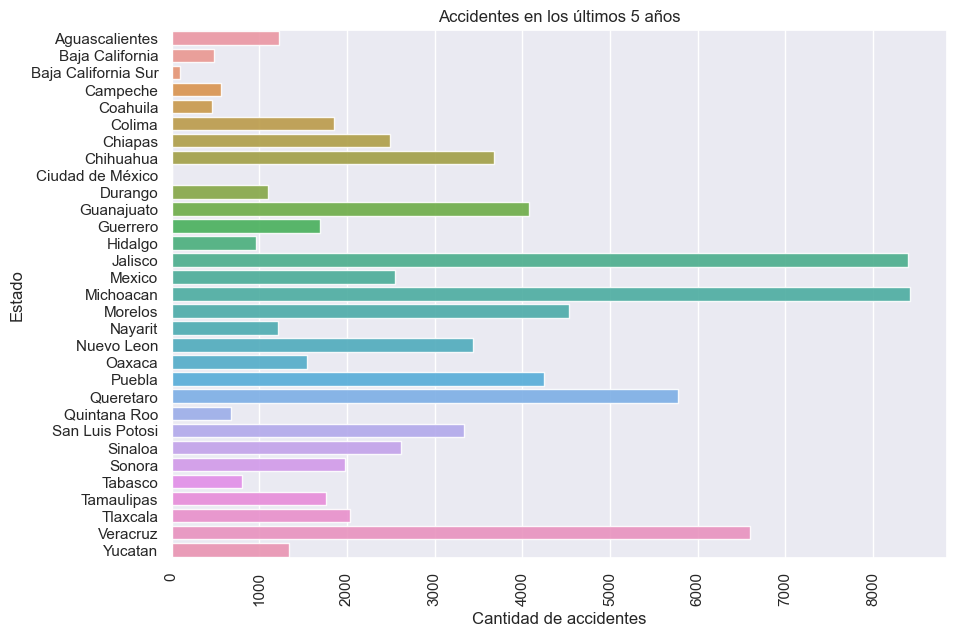

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(y = tidy_suma['Entidad'], x = tidy_suma['Total_accidentes'], alpha=0.9)

plt.title('Accidentes en los últimos 5 años')
plt.ylabel('Estado', fontsize=12)
plt.xlabel('Cantidad de accidentes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Notemos que los estados con mayor cantidad de accidentes son los siguientes:
1. Michoacan
2. Jalisco
3. Veracruz
4. Queretaro
5. Morelos

Veamos que sucede con los accidentes fatales.

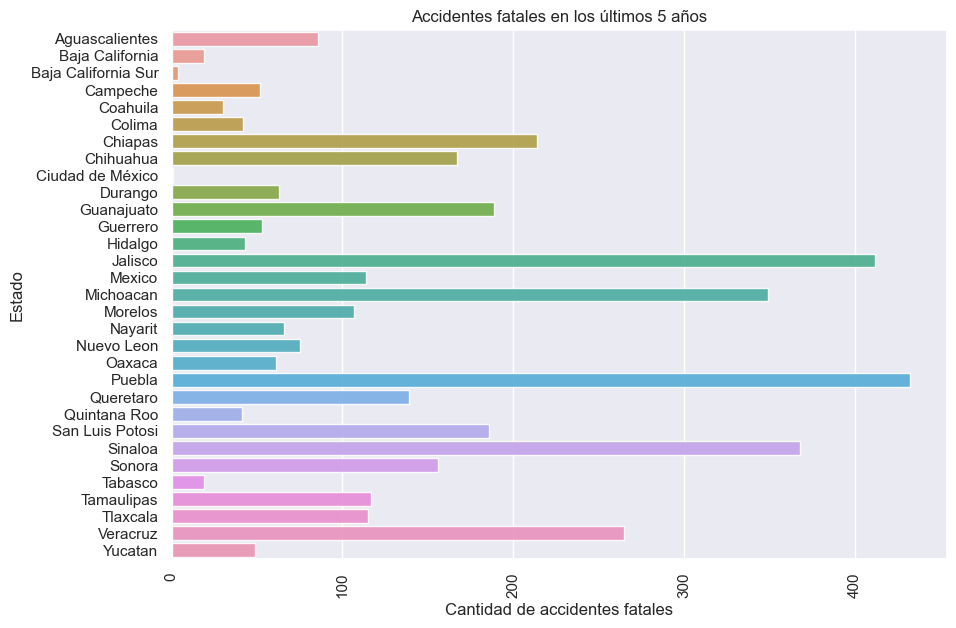

In [22]:
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(y = tidy_suma['Entidad'], x = tidy_suma['CLASACC_Fatal'], alpha=0.9)

plt.title('Accidentes fatales en los últimos 5 años')
plt.ylabel('Estado', fontsize=12)
plt.xlabel('Cantidad de accidentes fatales', fontsize=12)
plt.xticks(rotation=90)
plt.show()

A pesar de que Puebla no figura entre los estados con la mayor cantidad de accidentes, es el estado donde hay más accidentes fatales.

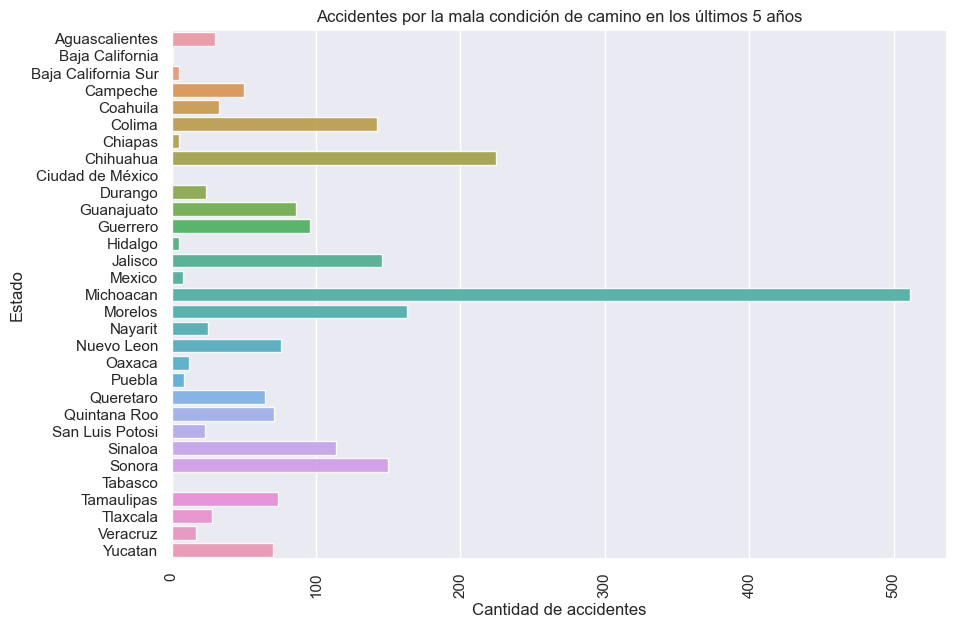

In [23]:
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(y = tidy_suma['Entidad'], x = tidy_suma['CAUSAACCI_Mala condición del camino'], alpha=0.9)

plt.title('Accidentes por la mala condición de camino en los últimos 5 años')
plt.ylabel('Estado', fontsize=12)
plt.xlabel('Cantidad de accidentes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [24]:
tidy_suma['CAUSAACCI_Mala condición del camino']

0      30
1       1
2       5
3      50
4      33
5     142
6       5
7     225
8       0
9      24
10     86
11     96
12      5
13    146
14      8
15    511
16    163
17     25
18     76
19     12
20      9
21     65
22     71
23     23
24    114
25    150
26      0
27     74
28     28
29     17
30     70
Name: CAUSAACCI_Mala condición del camino, dtype: int64

Notemos que en Michoacan es donde se ha reportado la mayor cantidad de accidentes causados por la mala condición del camino. Sonora se encuentra en el top 5. 
1. Michoacan
2. Chihuahua
3. Morelos
4. Sonora
5. Jalisco

In [25]:
presupuesto_total = tidy_suma[['Presupuesto 2017','Presupuesto 2018','Presupuesto 2019','Presupuesto 2020','Presupuesto 2021']].copy()
presupuesto_total = presupuesto_total.sum(axis = 1)
presupuesto_total = presupuesto_total.to_frame('Presupuesto')

tidy_suma['Presupuesto'] = presupuesto_total
tidy_suma.head()

,ID_ENTIDAD,Total_accidentes,CAUSAACCI_Conductor,CAUSAACCI_Mala condición del camino,CAUSAACCI_Otra,CLASACC_Fatal,CLASACC_No fatal,CLASACC_Sólo daños,ANIO_2017,ANIO_2018,ANIO_2019,ANIO_2020,ANIO_2021,Presupuesto 2017,Presupuesto 2018,Presupuesto 2019,Presupuesto 2020,Presupuesto 2021,Entidad,Presupuesto
0,1,1222,1192,30,0,86,440,696,228,241,191,254,308,1230564370,763497156,698139978,801262825,619602783,Aguascalientes,4113067112
1,2,489,479,1,9,19,128,342,14,60,74,123,218,1570031154,9730725095,6664542845,1443654047,2622630589,Baja California,22031583730
2,3,93,87,5,1,4,30,59,21,21,18,15,18,1201590701,2032211730,1474567507,1102611193,937524627,Baja California Sur,6748505758
3,4,559,505,50,4,52,182,325,117,126,121,97,98,105920604960,92634515442,89364091716,167022332994,170554682448,Campeche,625496227560
4,5,466,427,33,6,30,88,348,71,69,105,77,144,1764773023,2094854701,11314959253,5078344488,1812974402,Coahuila,22065905867


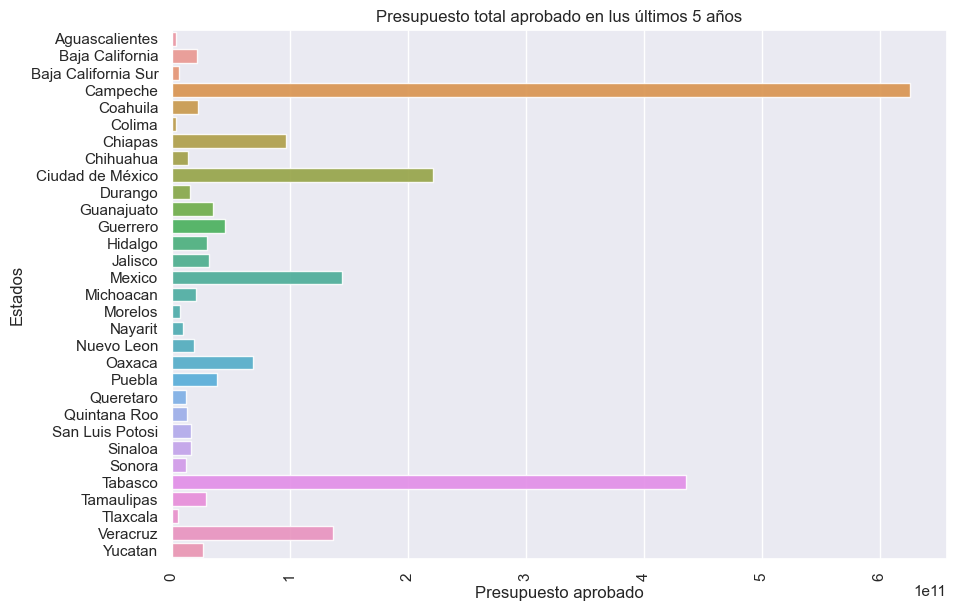

In [26]:
plt.figure(figsize=(10, 7))
sns.set(style="darkgrid")
sns.barplot(y = tidy_suma['Entidad'], x = tidy_suma['Presupuesto'], alpha=0.9)

plt.title('Presupuesto total aprobado en lus últimos 5 años')
plt.ylabel('Estados', fontsize=12)
plt.xlabel('Presupuesto aprobado', fontsize=12)
plt.xticks(rotation=90)
plt.show()

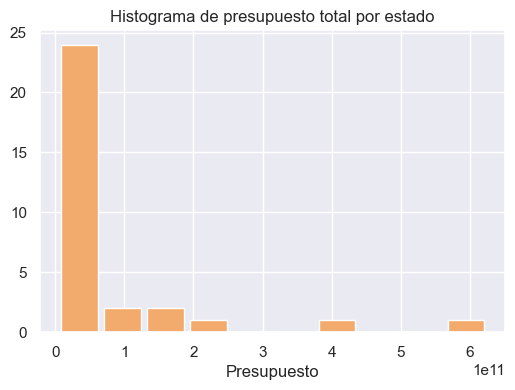

In [40]:
# Creamos un histograma
plt.hist(x=presupuesto_total, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de presupuesto total por estado')
plt.xlabel('Presupuesto')
plt.show() #dibujamos el histograma

### 3.2.2 Relación entre la cantidad de accidentes causados por la mala condición del camino y el presupuesto estatal aprobado

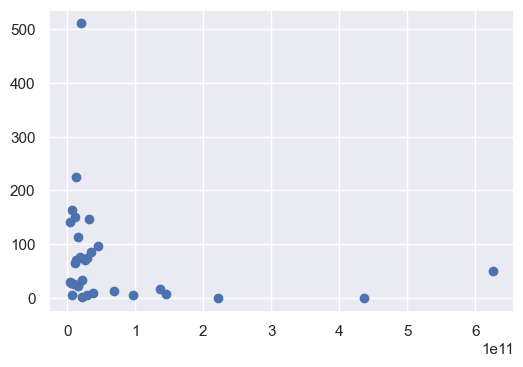

In [27]:
plt.scatter(x = tidy_suma['Presupuesto'] , y = tidy_suma['CAUSAACCI_Mala condición del camino'])

No parece existir una correlación lineal entre estos valores.

Analicemos la correlación que existe entre cantidad de accidentes causados por la mala condición del camino y el presupuesto estatal aprobado por estado.

In [29]:
tidy_suma_anual

,ID_ENTIDAD,ANIO,Total_accidentes,CAUSAACCI_Conductor,CAUSAACCI_Mala condición del camino,CAUSAACCI_Otra,CLASACC_Fatal,CLASACC_No fatal,CLASACC_Sólo daños,Presupuesto,Entidad
0,1,2017,14966,14272,362,332,894,4102,9970,1230564370,Aguascalientes
1,1,2018,17592,16726,480,386,914,4431,12247,763497156,Aguascalientes
2,1,2019,16757,16075,516,166,837,4509,11411,698139978,Aguascalientes
3,1,2020,15057,14448,441,168,775,3971,10311,801262825,Aguascalientes
4,1,2021,17476,16738,513,225,859,4741,11876,619602783,Aguascalientes
...,...,...,...,...,...,...,...,...,...,...,...
150,31,2017,14966,14272,362,332,894,4102,9970,4083206552,Yucatán
151,31,2018,17592,16726,480,386,914,4431,12247,3096657566,Yucatán
152,31,2019,16757,16075,516,166,837,4509,11411,3064347028,Yucatán
153,31,2020,15057,14448,441,168,775,3971,10311,2308676495,Yucatán


In [30]:
# Abrimos el diccionario de entidades

# Generamos el dataframe de entidades
entidades = pd.read_csv("tc_entidad.csv", index_col=False)

# Cambiamos los valores de nombres de entidad por los nombres cortos
entidades.replace('Veracruz de Ignacio de la Llave', 'Veracruz', True)
entidades.replace('Michoacan de Ocampo', 'Michoacan', True)
entidades.replace('Coahuila de Zaragoza', 'Coahuila', True)

Baja California


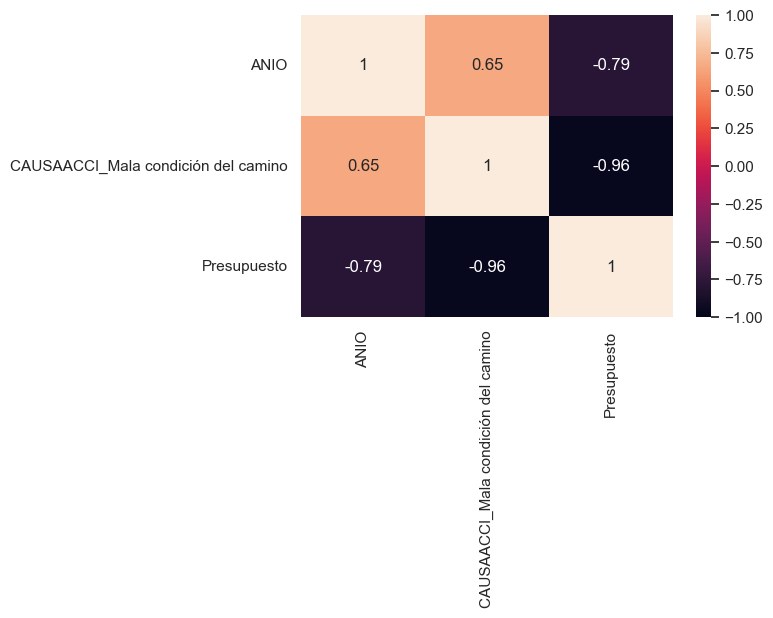

Baja California Sur


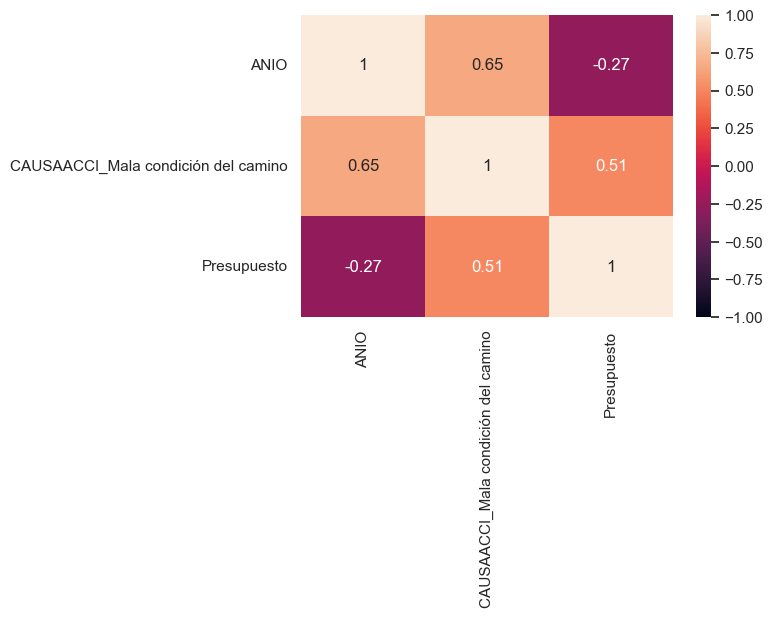

Campeche


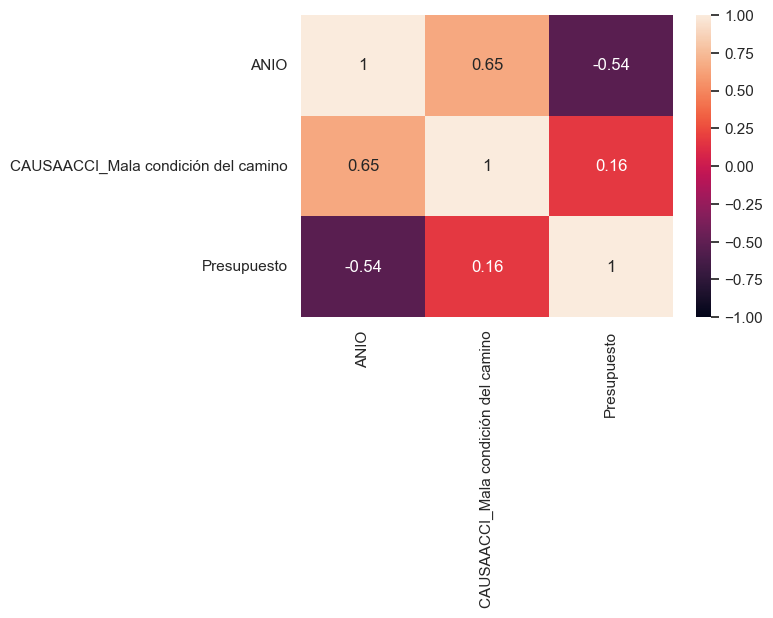

Coahuila


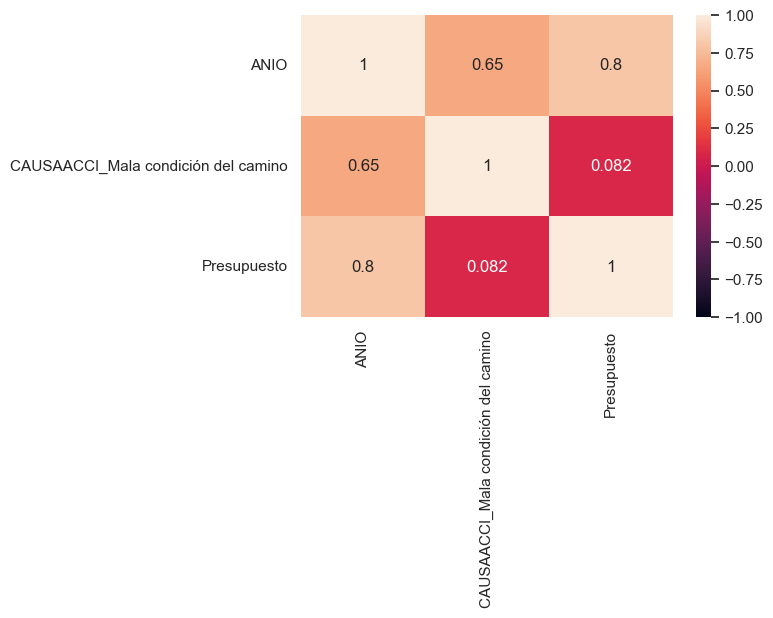

Colima


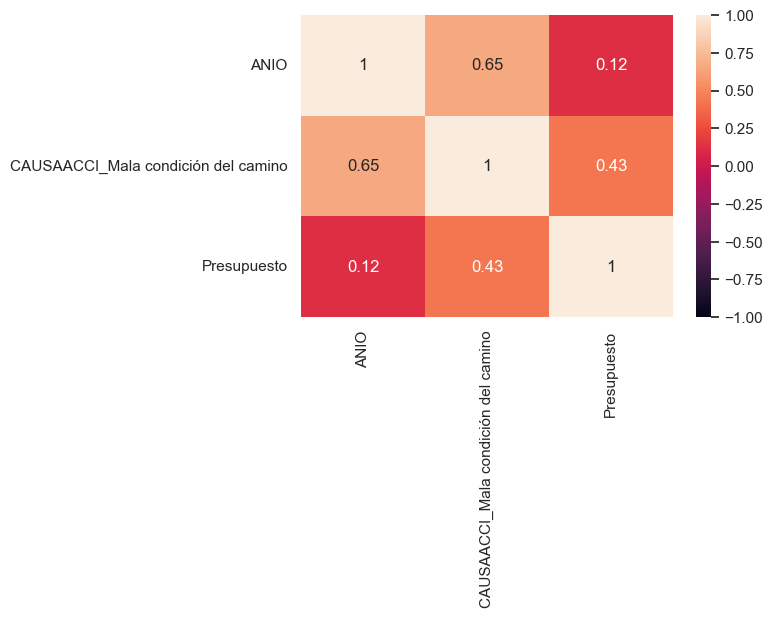

Chiapas


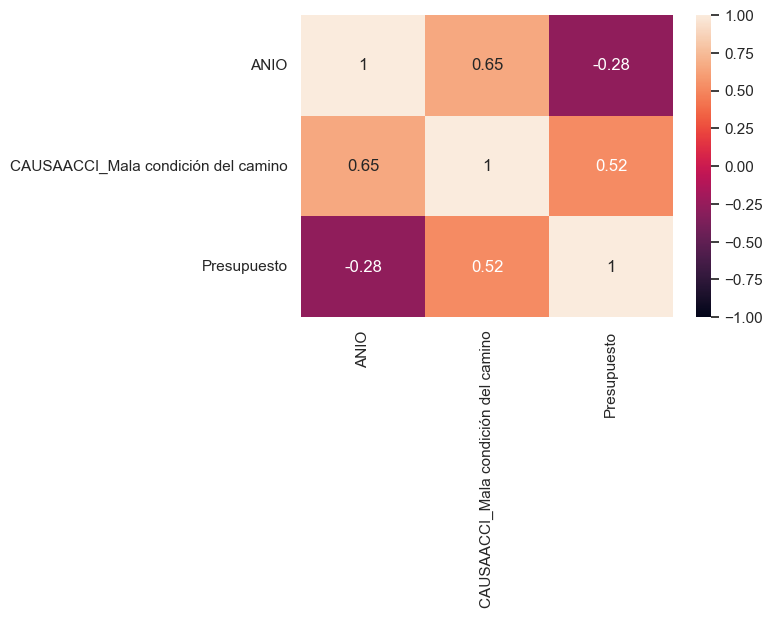

Chihuahua


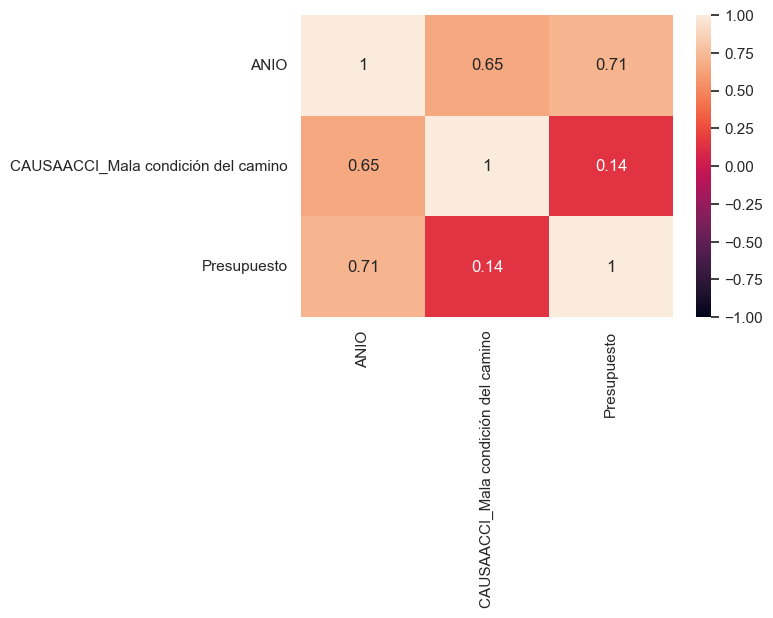

Ciudad de México


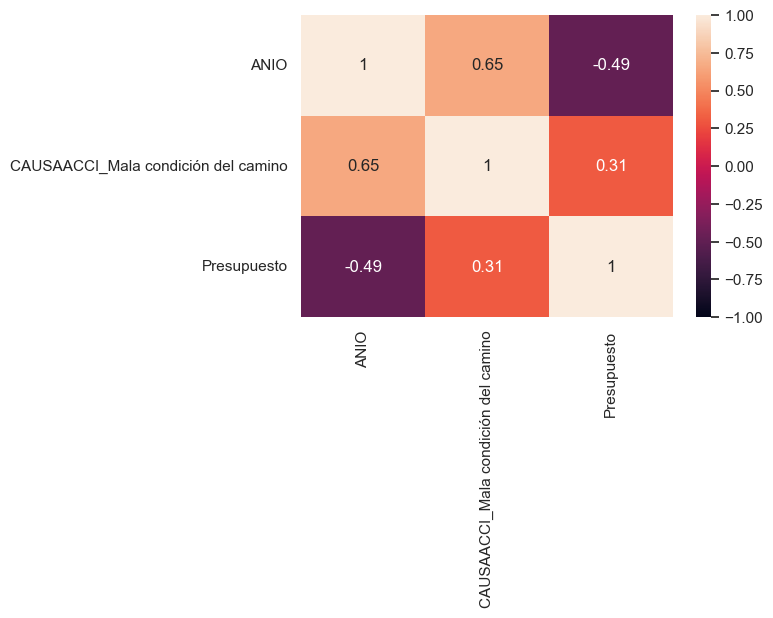

Durango


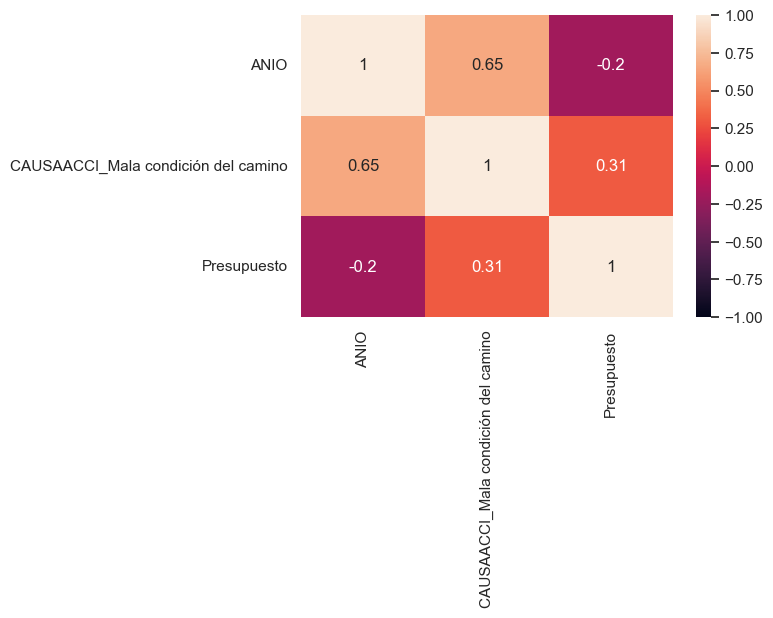

Guanajuato


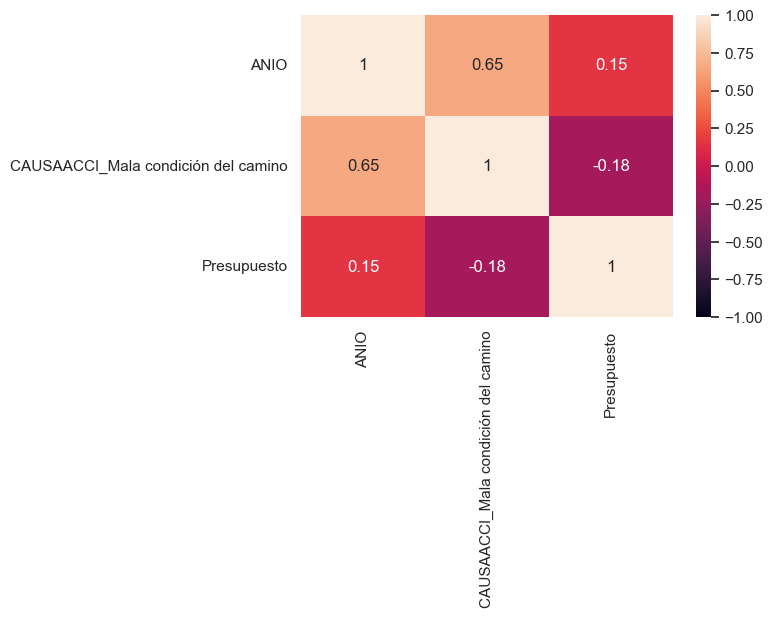

Guerrero


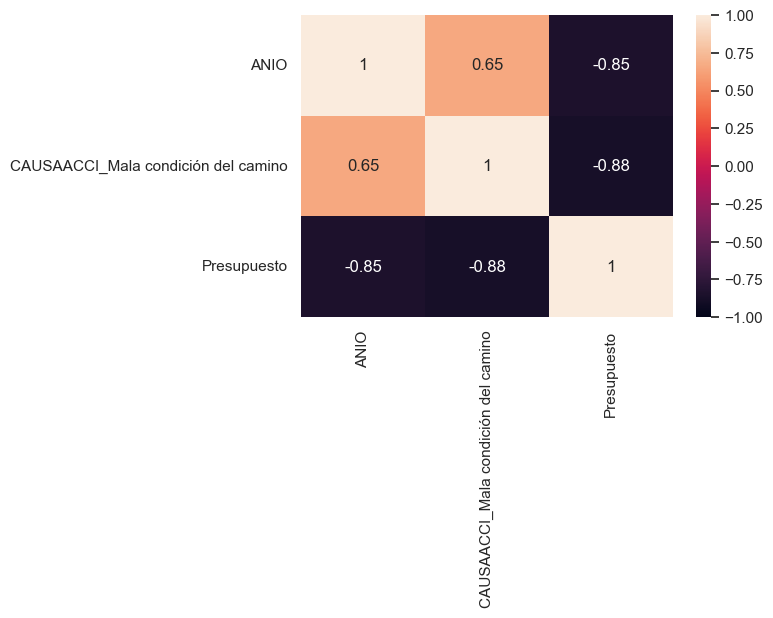

Hidalgo


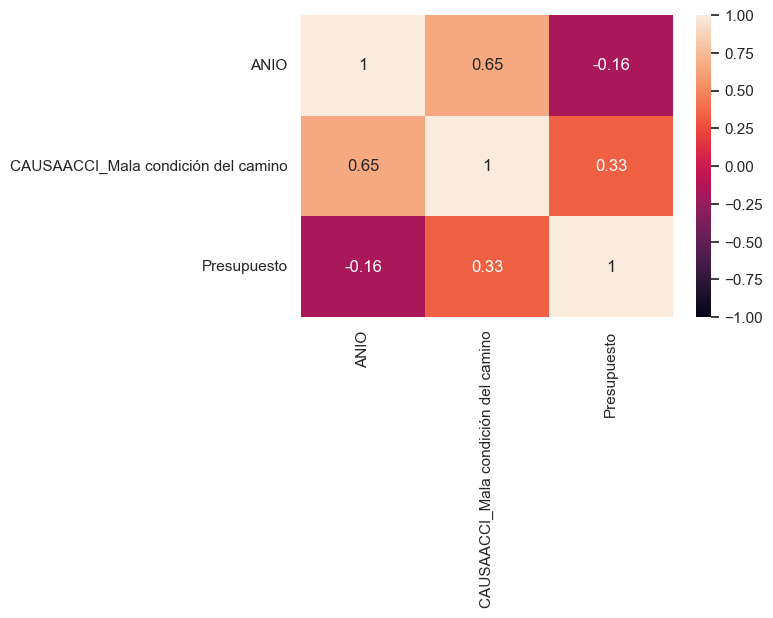

Jalisco


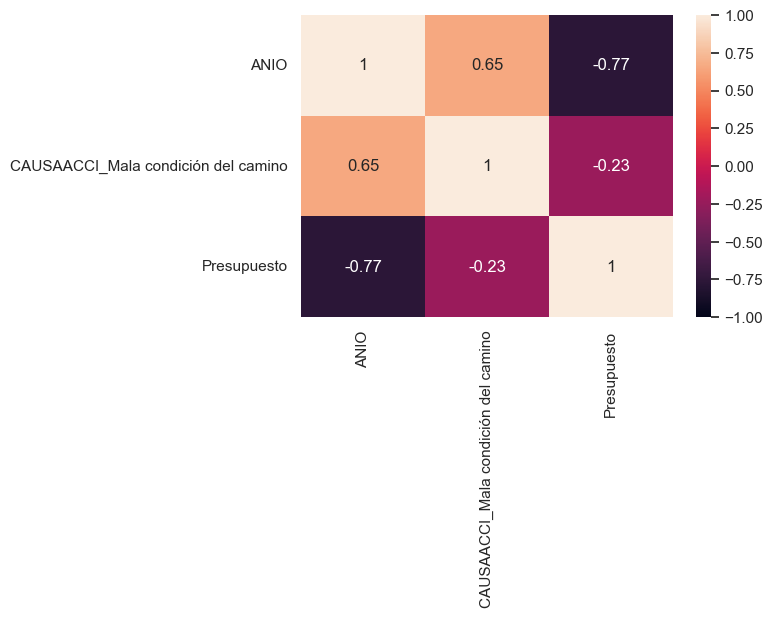

Mexico


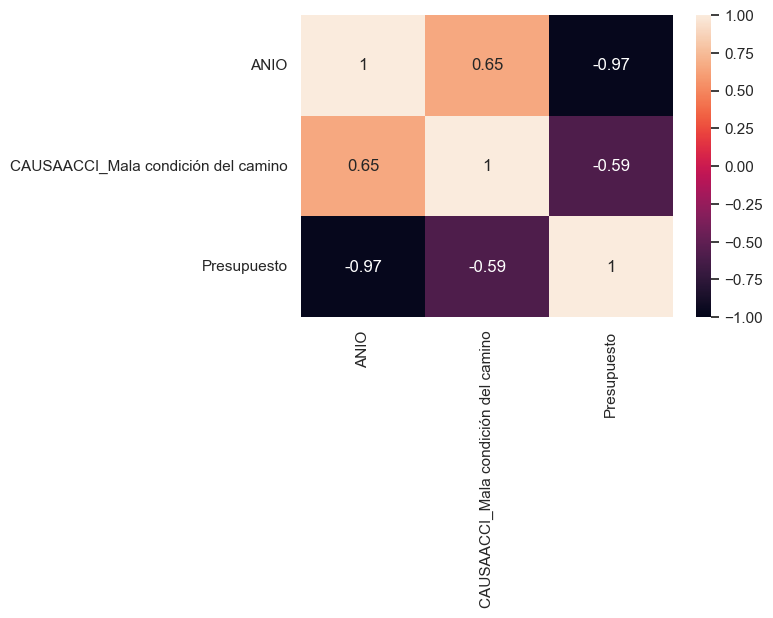

Michoacan


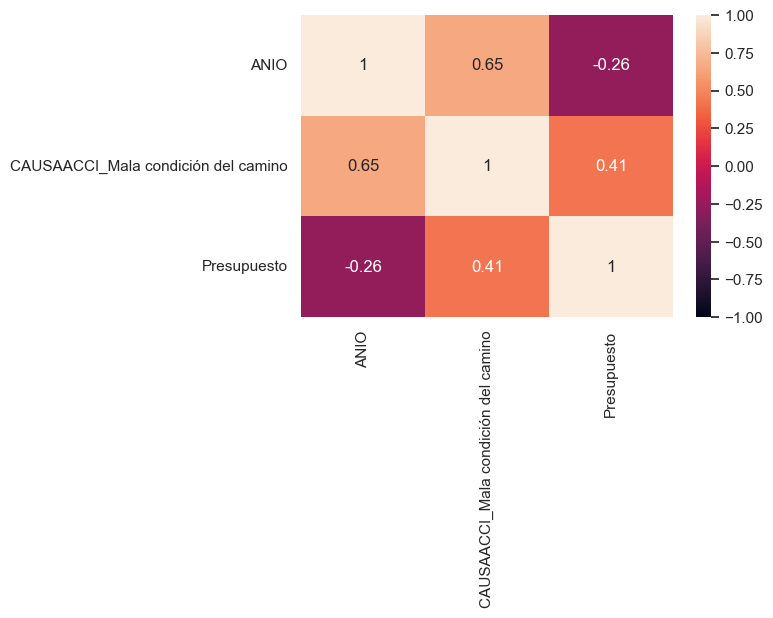

Morelos


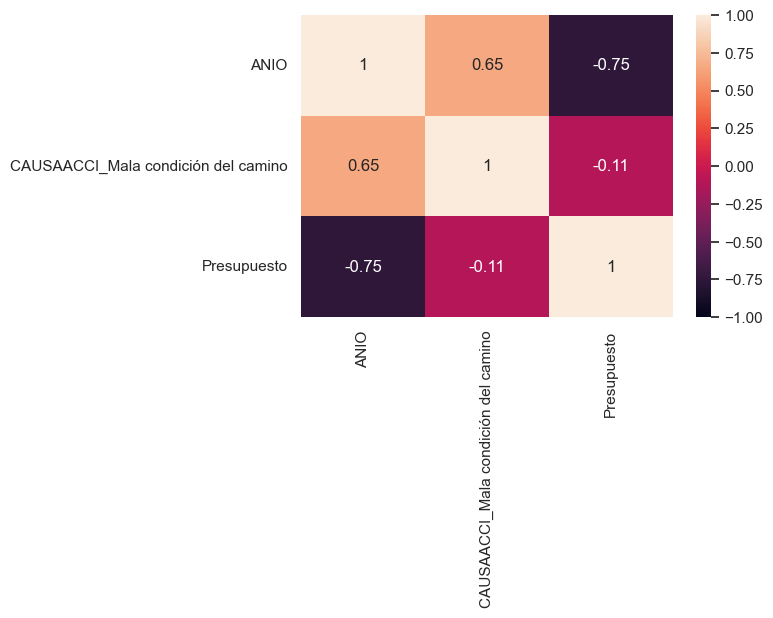

Nayarit


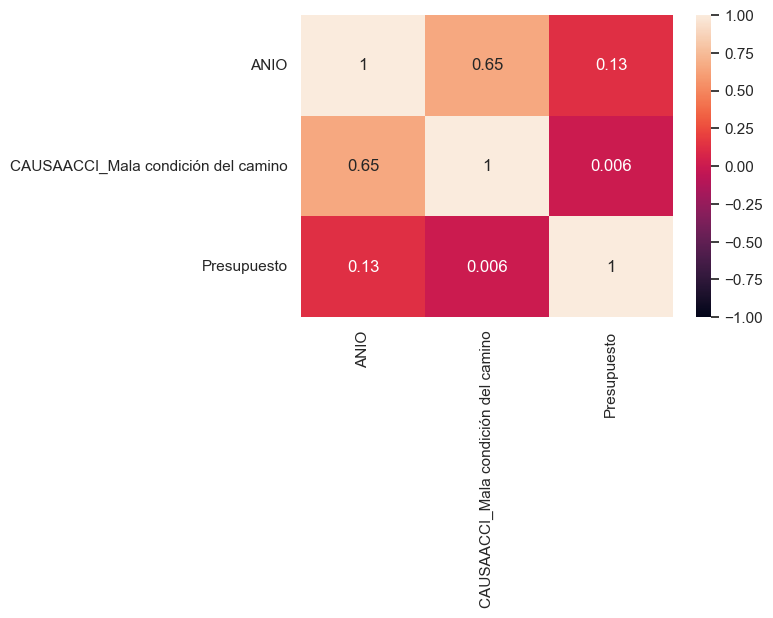

Nuevo Leon


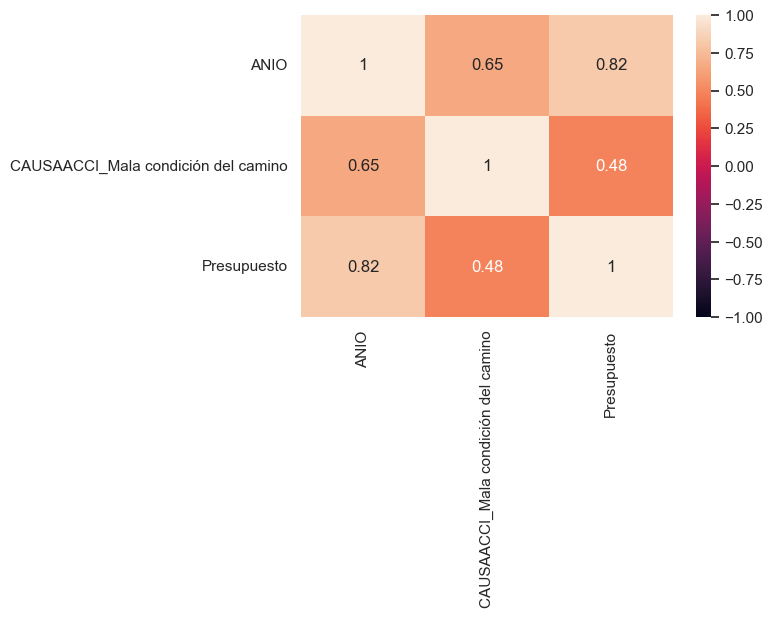

Oaxaca


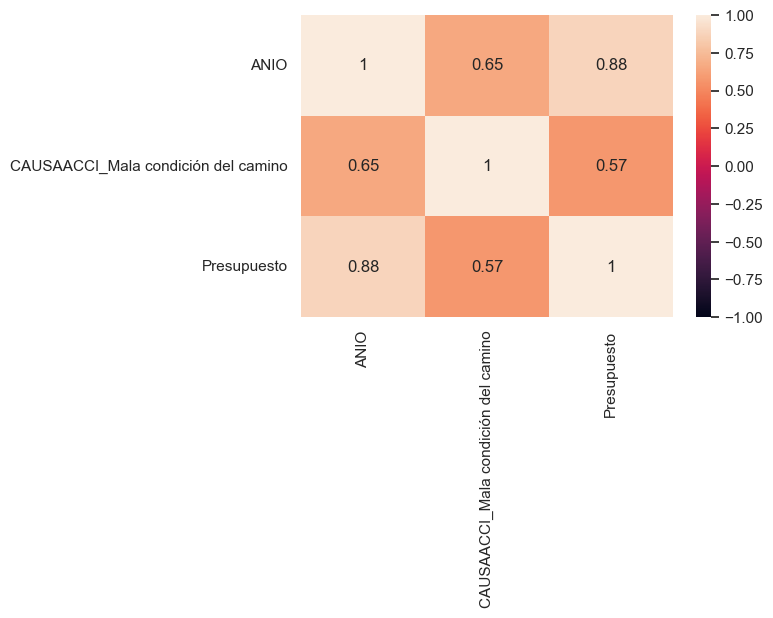

Puebla


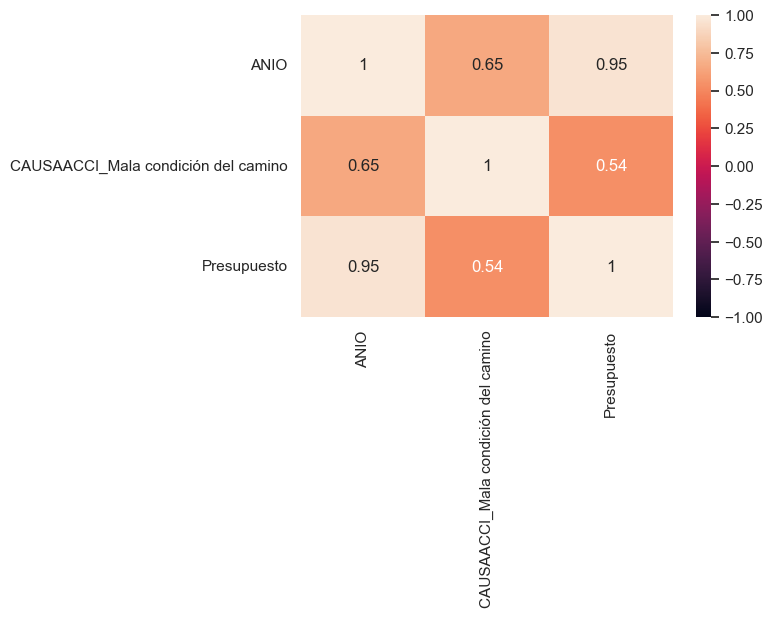

Queretaro


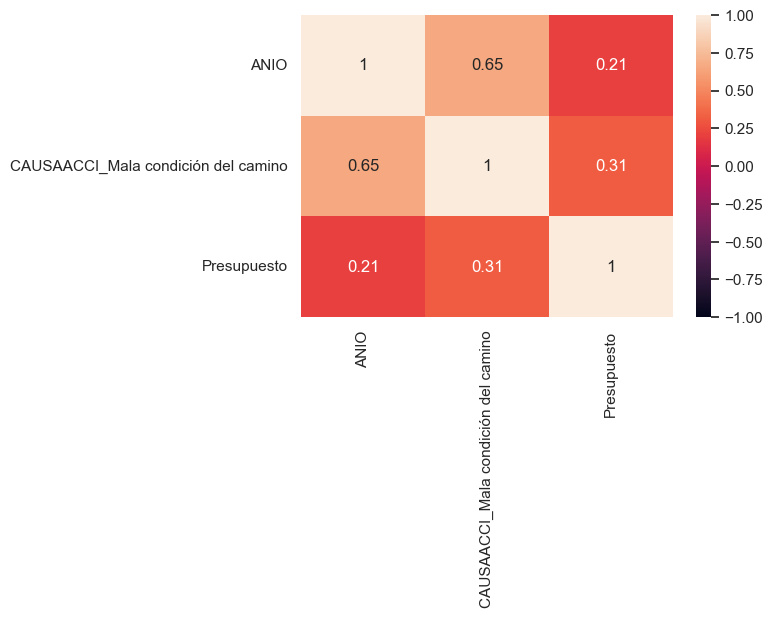

Quintana Roo


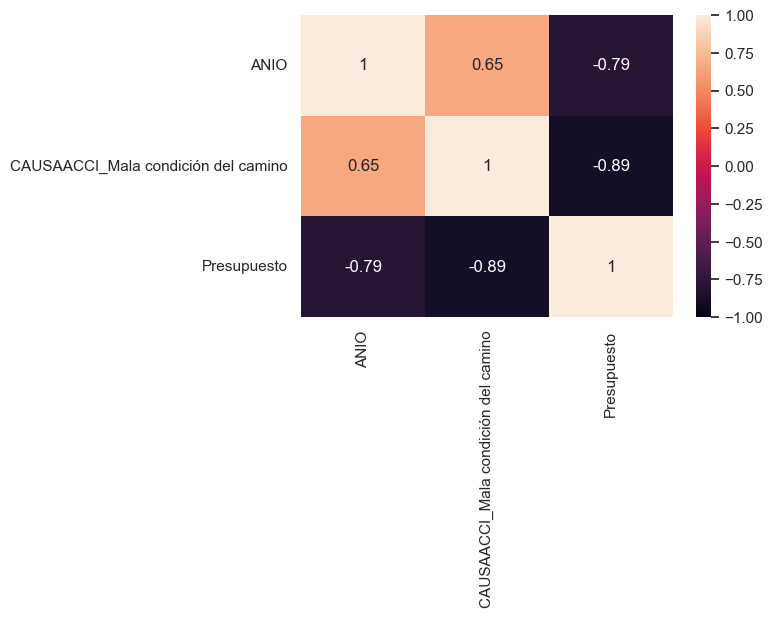

San Luis Potosi


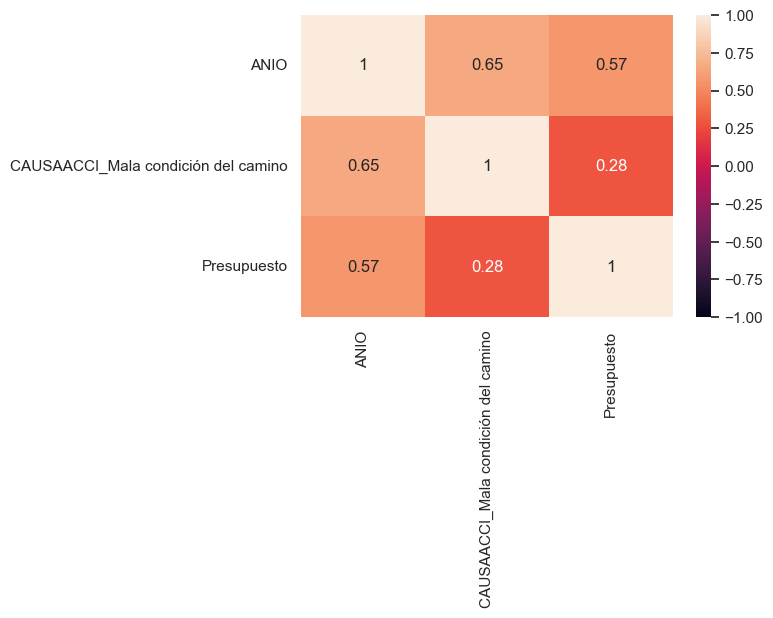

Sinaloa


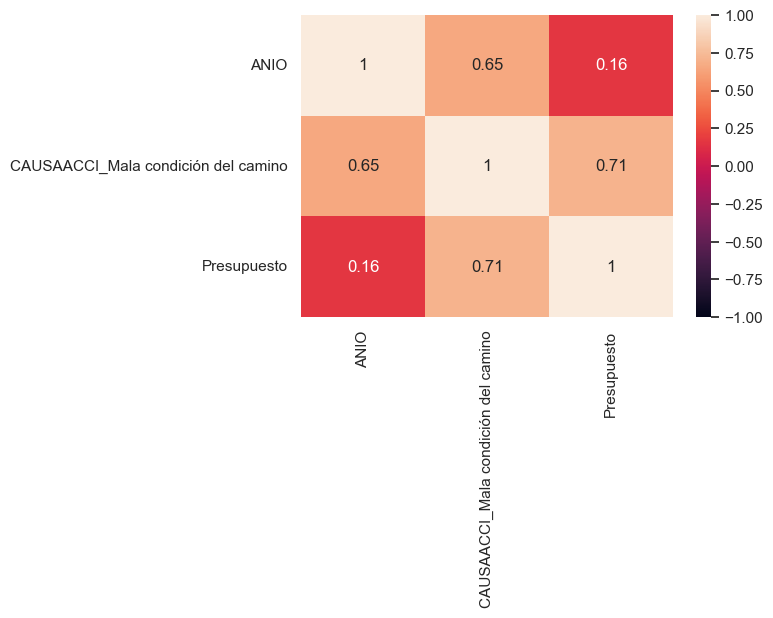

Sonora


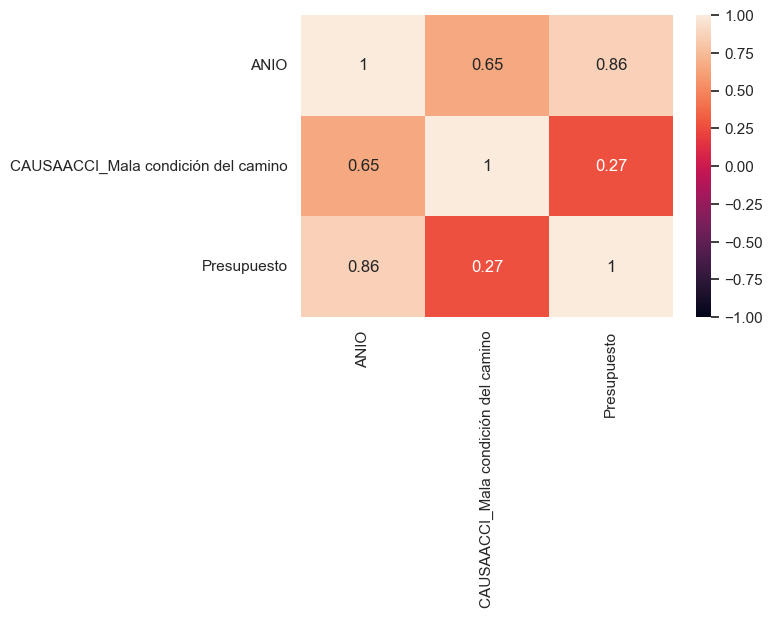

Tabasco


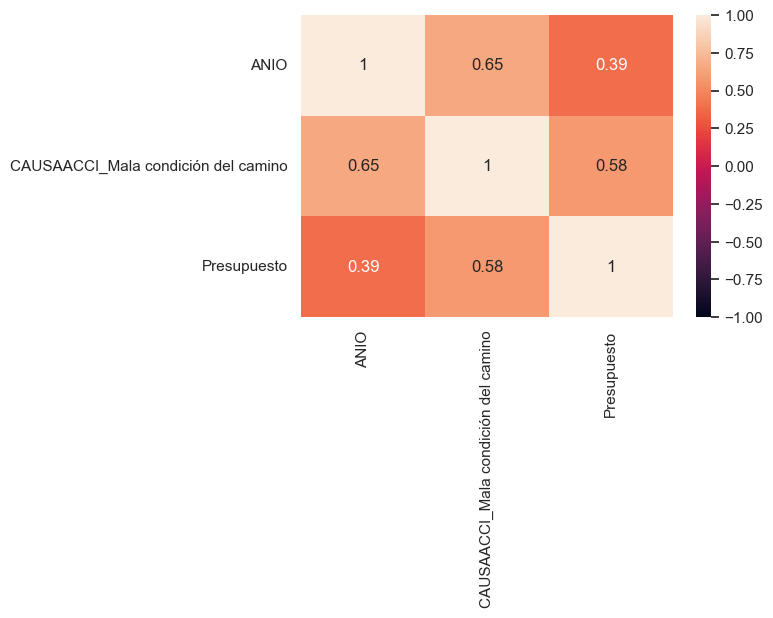

Tamaulipas


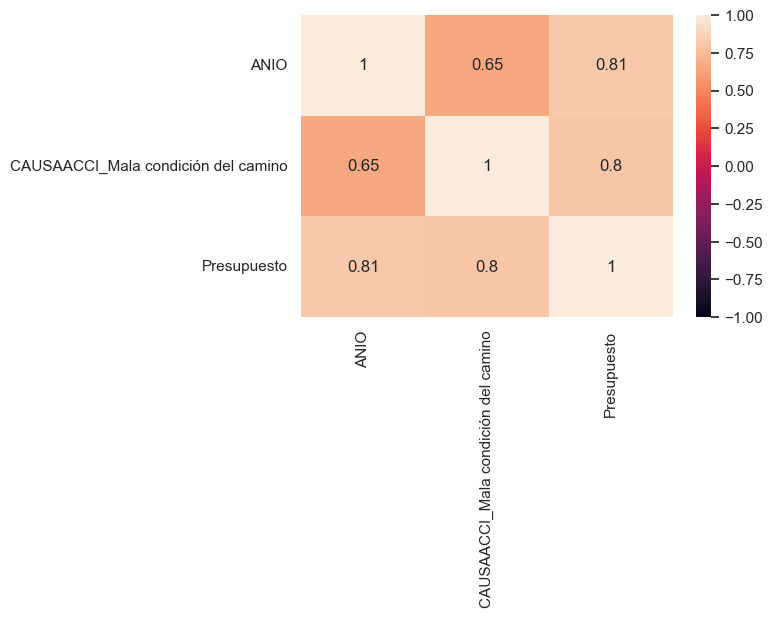

Tlaxcala


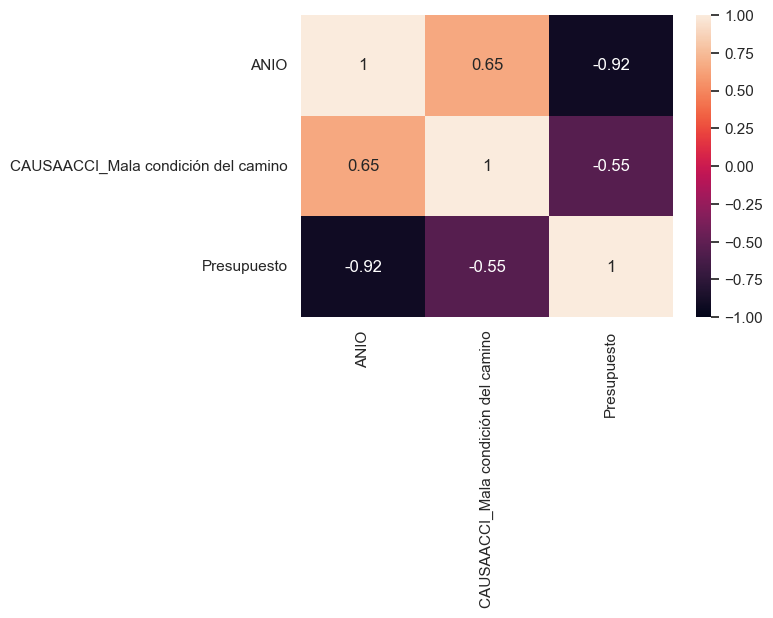

Veracruz


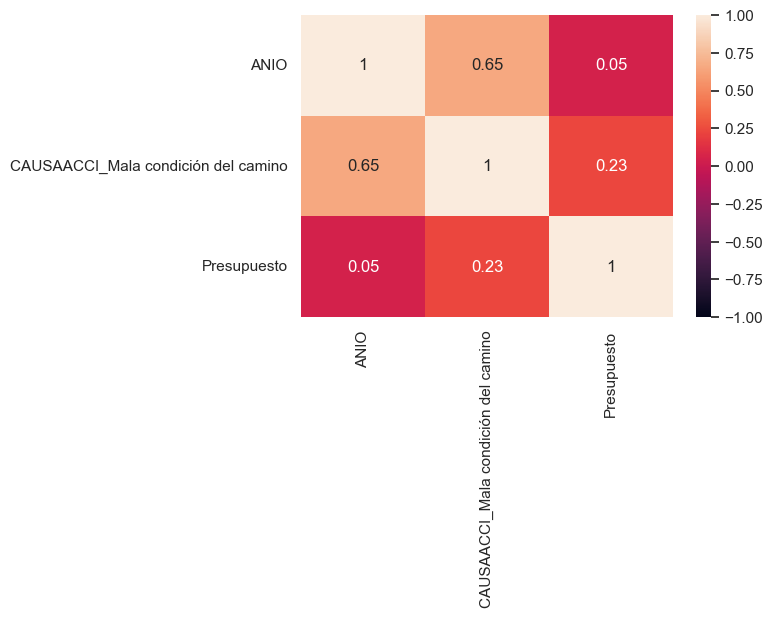

Yucatan


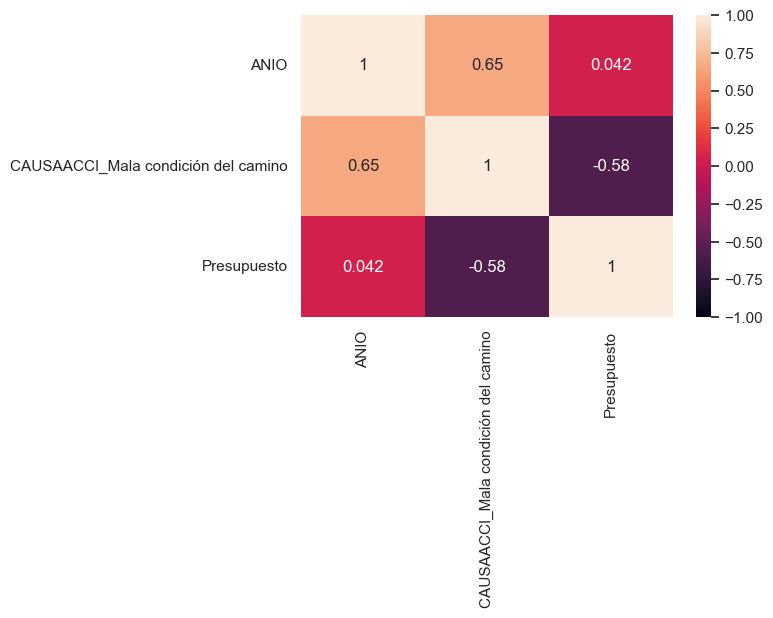

Zacatecas


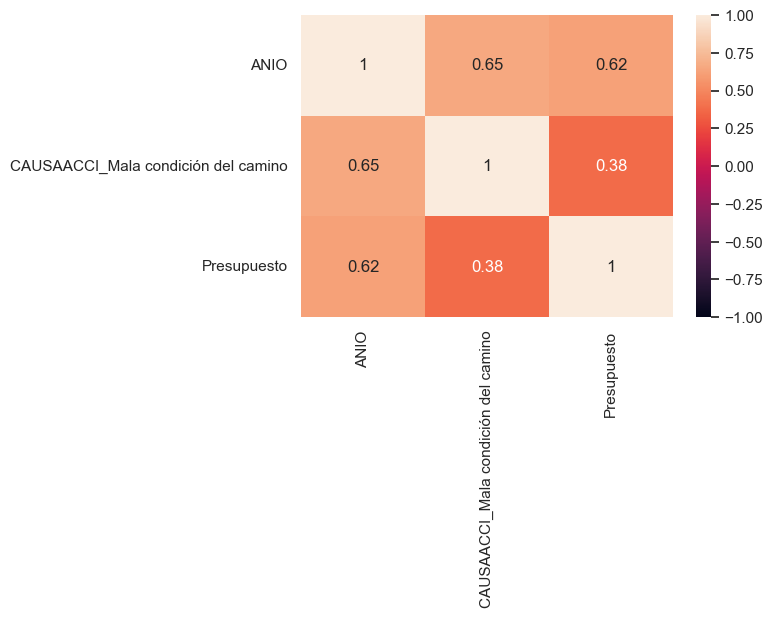

In [31]:
# Crearemos una matriz de correlación por estado y lo visualizaremos con un mapa de calor
for edo in range(1, 32):
    print(entidades.loc[edo,'NOM_ENTIDAD'])
    df = tidy_suma_anual[tidy_suma_anual['ID_ENTIDAD'] == edo]
    df = df[['ANIO', 'CAUSAACCI_Mala condición del camino', 'Presupuesto']]
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
    plt.show()

Baja California


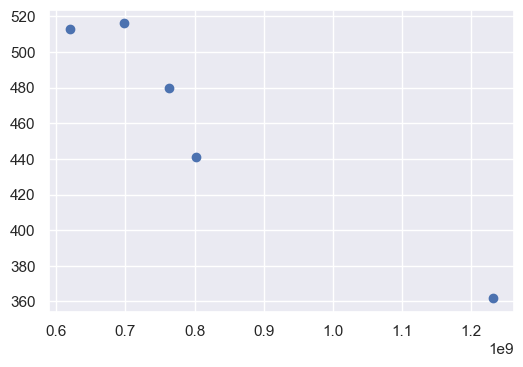

Baja California Sur


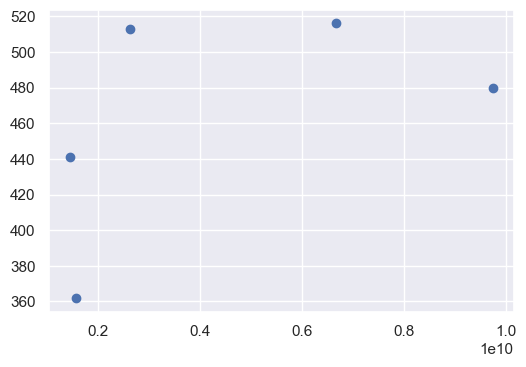

Campeche


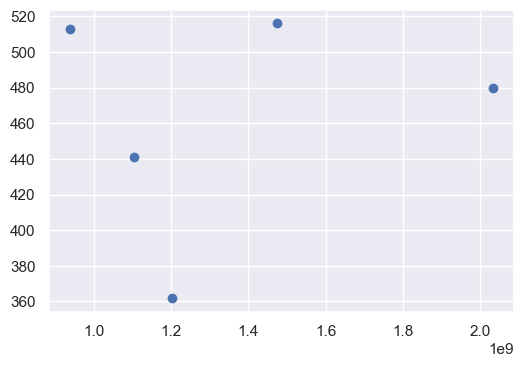

Coahuila


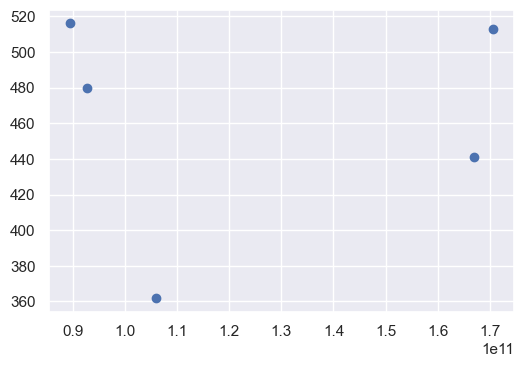

Colima


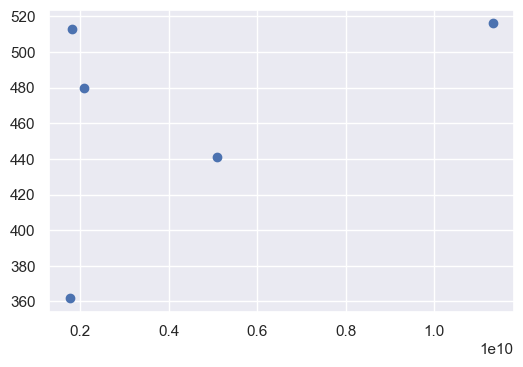

Chiapas


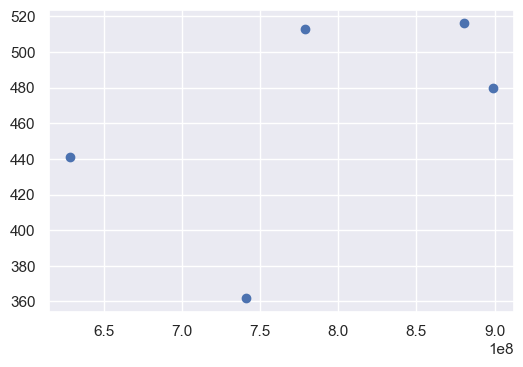

Chihuahua


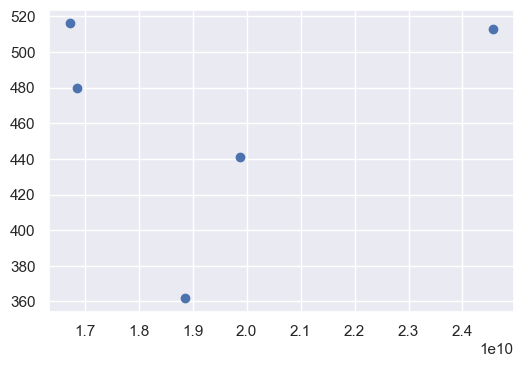

Ciudad de México


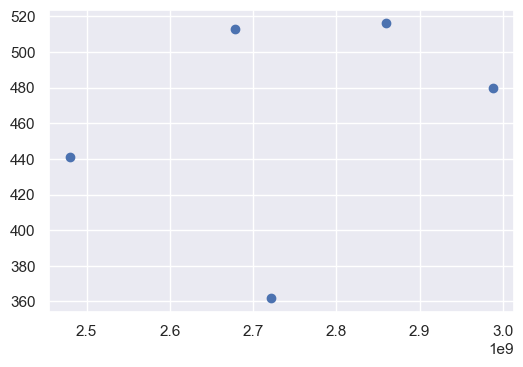

Durango


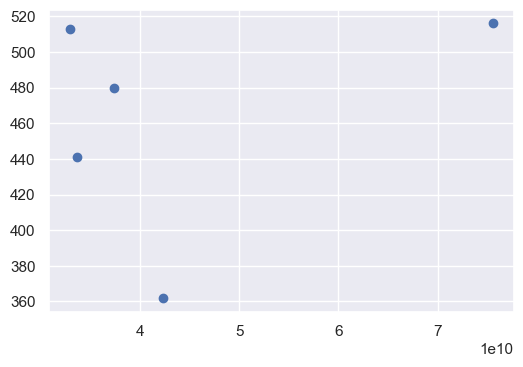

Guanajuato


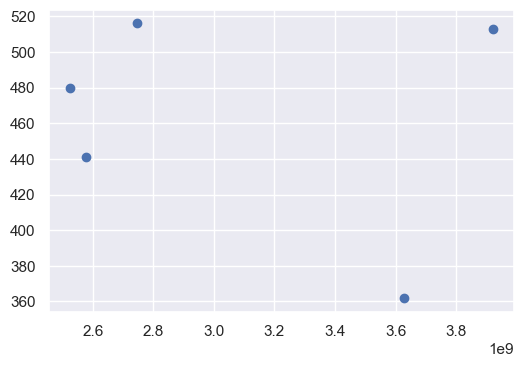

Guerrero


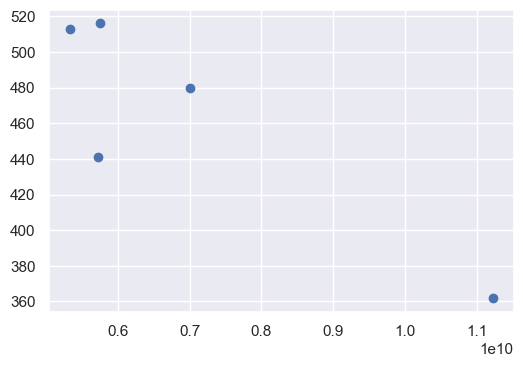

Hidalgo


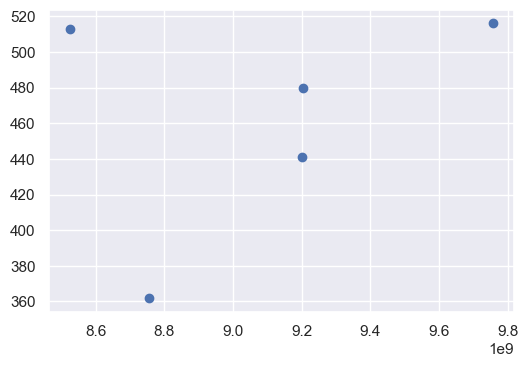

Jalisco


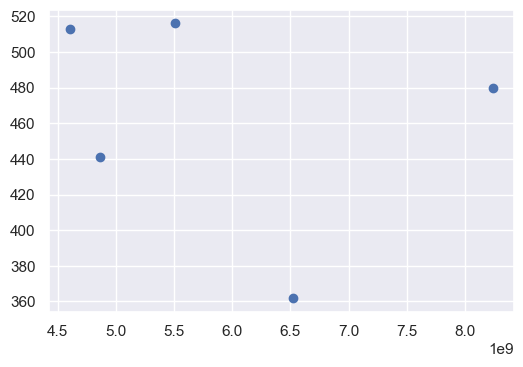

Mexico


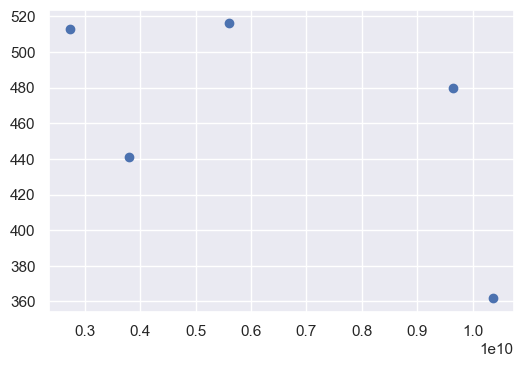

Michoacan


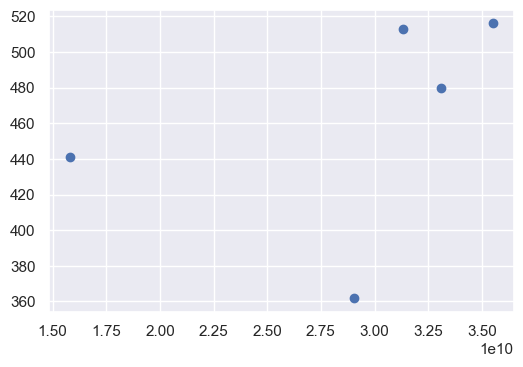

Morelos


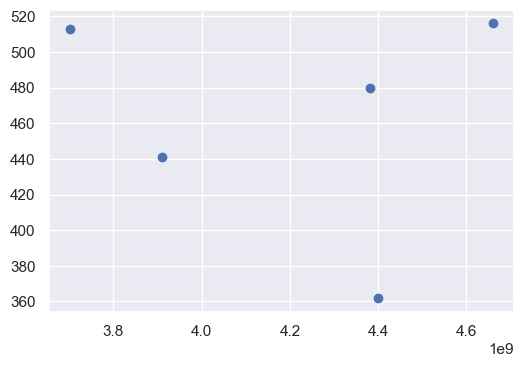

Nayarit


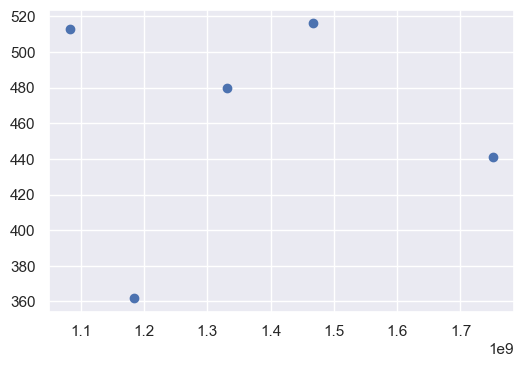

Nuevo Leon


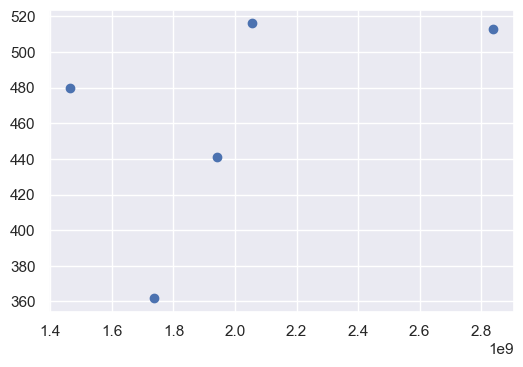

Oaxaca


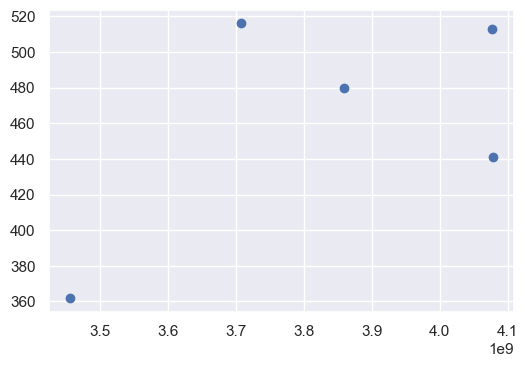

Puebla


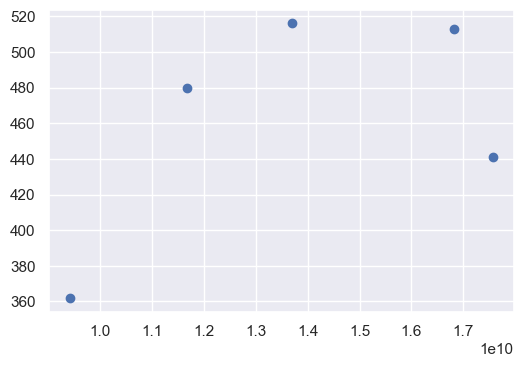

Queretaro


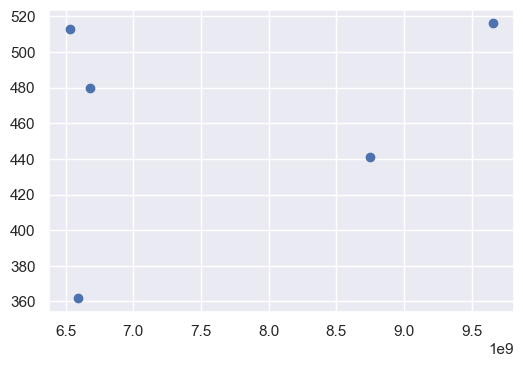

Quintana Roo


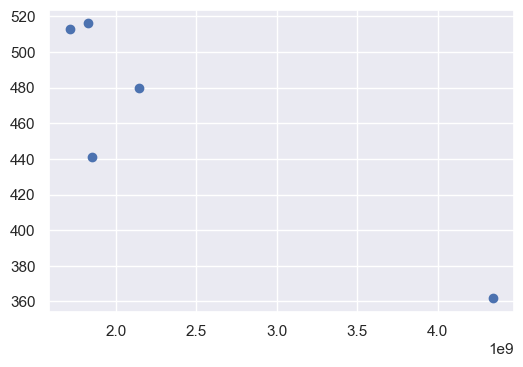

San Luis Potosi


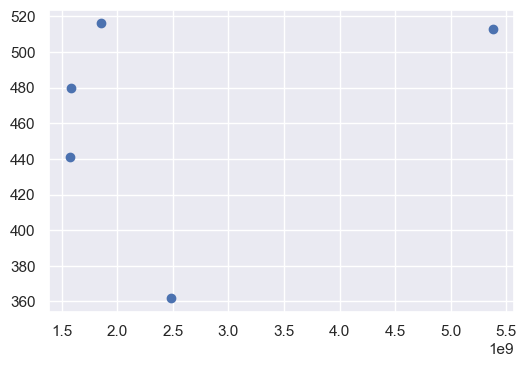

Sinaloa


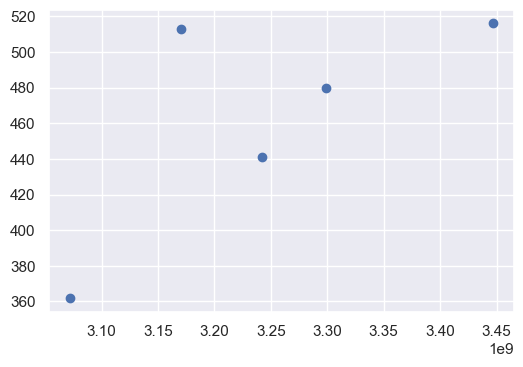

Sonora


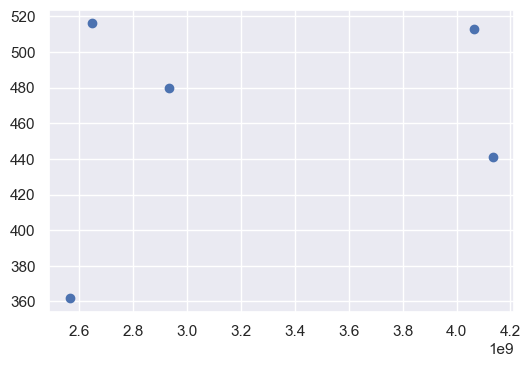

Tabasco


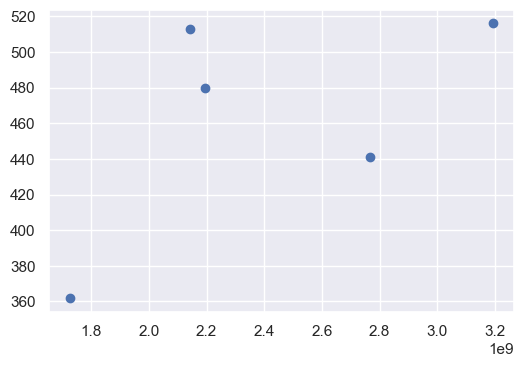

Tamaulipas


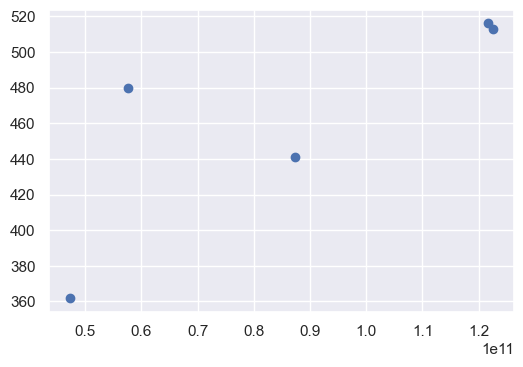

Tlaxcala


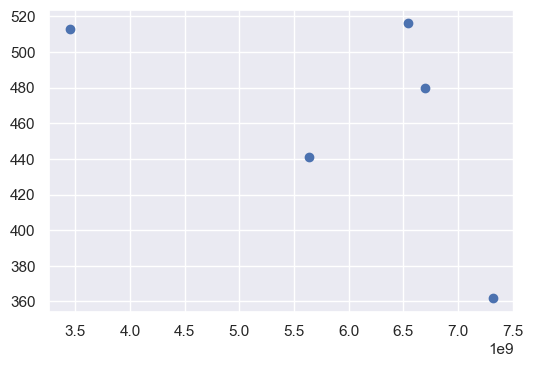

Veracruz


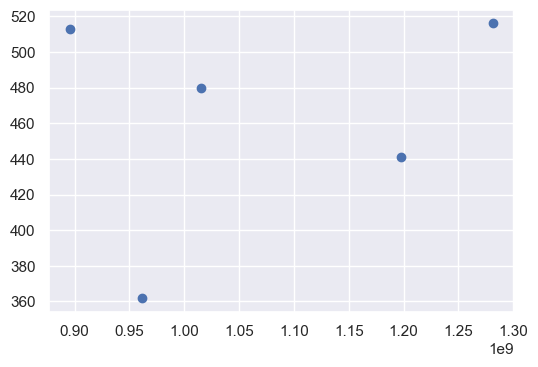

Yucatan


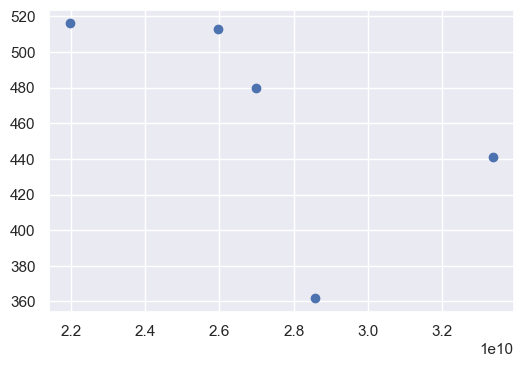

Zacatecas


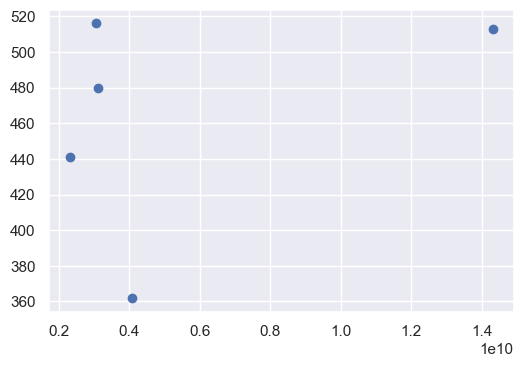

In [32]:
# Crearemos un scatterplot por estado
for edo in range(1, 32):
    print(entidades.loc[edo,'NOM_ENTIDAD'])
    df = tidy_suma_anual[tidy_suma_anual['ID_ENTIDAD'] == edo]
    df = df[['CAUSAACCI_Mala condición del camino', 'Presupuesto']]
    plt.scatter(x = df['Presupuesto'] , y = df['CAUSAACCI_Mala condición del camino'])
    plt.show()